<a id='TOP'> </a>
___
<!-- for i in range(1,14):
    print(f'|[--__{i}__--](#{i})|') -->

# Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the _Zillow_ data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an 'end-to-end project' in which you use some of their 'Kaggle' data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

<a id='1'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

In [3]:
from wrangle import wrangle_zillow, scale_zillow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import pearsonr, spearmanr


<a id='2'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

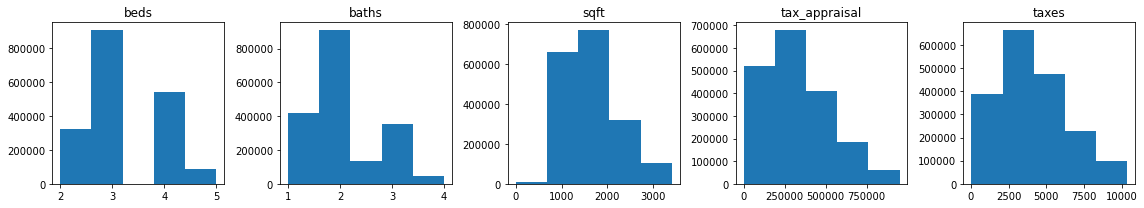

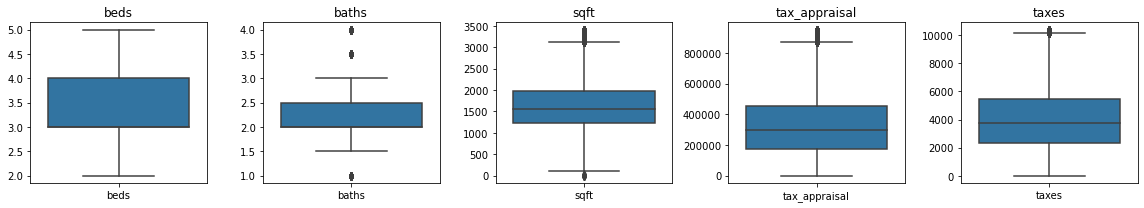

In [7]:
train, validate, test = wrangle_zillow()

In [8]:
train = train[sorted(train.columns)]

In [9]:
validate = validate[sorted(validate.columns)]

In [10]:
test = test[sorted(test.columns)]

In [18]:
train

,baths,beds,fips,sqft,tax_appraisal,taxes,yr_built
10057,2.0,4.0,6059.0,1561.0,248240.0,2504.40,1973
2004970,2.0,3.0,6037.0,1770.0,88390.0,1671.93,1960
306031,1.0,2.0,6037.0,1452.0,81169.0,1310.88,1946
1038595,1.0,3.0,6037.0,1000.0,119174.0,1900.28,1950
270959,2.0,3.0,6037.0,1974.0,432268.0,5315.27,1988
...,...,...,...,...,...,...,...
991122,1.0,3.0,6111.0,1199.0,280857.0,3282.40,1951
1707759,2.0,4.0,6037.0,1859.0,95008.0,1463.61,1961
1770246,3.0,3.0,6037.0,2132.0,158470.0,2037.38,1980
1500741,1.0,2.0,6037.0,780.0,477167.0,6509.69,1955


<a id='3'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 3. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

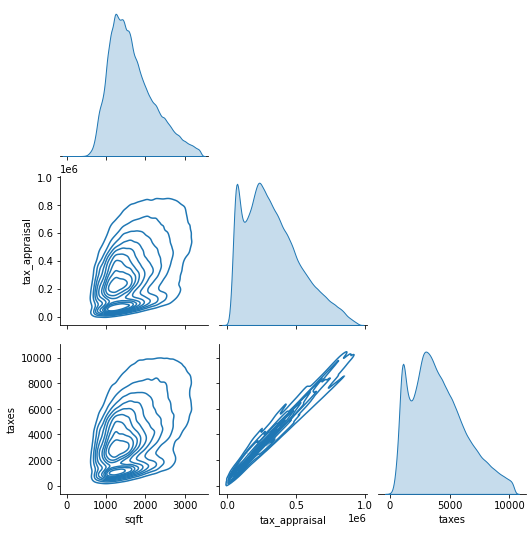

In [17]:
# try not to run this cell if you can avoid it...
%%timeit
# Next time this runs, fill in the time:______
sns.pairplot(data=train[['sqft', 'tax_appraisal', 'taxes']],
#              x_vars=,
             corner=True,
             kind='kde'
            )
plt.show()

In [53]:
# cols = train.columns.tolist()
trainx = train.columns.tolist()
trainy = train.columns.tolist()
for x in trainx:
    trainx.remove(x)
#     print(train_ys)
    for y in trainy:
        
        print(x,y)
        trainy.remove(y)
#         sns.lmplot(data = train,
#                      x= x,
#                      y= y,
#                      line_kws= {'color':'red'}
#                     )
#         plt.show()

baths baths
baths fips
baths tax_appraisal
baths yr_built
fips beds
fips taxes
tax_appraisal sqft


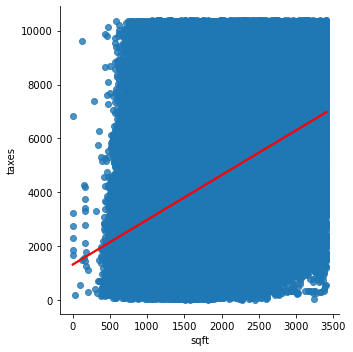

In [35]:
sns.lmplot(data=train,
              x= 'sqft',
              y= 'taxes',
              line_kws= {'color': 'red'}
)
plt.show()

In [33]:
# %%timeit
# sns.jointplot(data=train,
#               x= 'sqft',
#               y= 'tax_appraisal',
#               kind= 'scatter',
#               hue= 'fips'
# )
# plt.show()

In [25]:
corr = train.corr(method='spearman')

In [26]:
mask_corr = np.triu(corr)


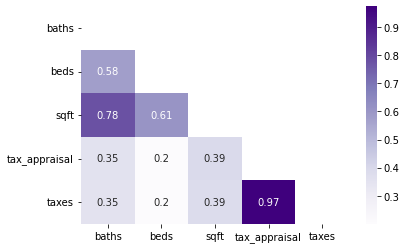

In [27]:
sns.heatmap(corr,
            cmap='Purples',
            annot=True,
            mask = mask_corr,
           )
plt.show()

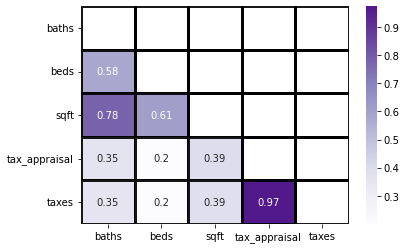

In [28]:
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}
sns.heatmap(corr,
            cmap='Purples',
            annot=True,
            mask = mask_corr,
            **kwargs
           )
plt.show()

<a id='4'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='5'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 5. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='6'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 6. Use the functions you created above to explore your Zillow train dataset in your `explore.ipynb` notebook.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='7'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 7. Come up with some initial hypotheses based on your goal of predicting property value.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='8'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 8. Visualize all combinations of variables in some way.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='9'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 9. Run the appropriate statistical tests where needed.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='10'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 10. What independent variables are correlated with the dependent variable, home value?
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='11'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='12'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='13'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 13. Explore your dataset with any other visualizations you think will be helpful.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='BONUS'> </a>
<div class="alert alert-block alert-info">
</div>

***
# Bonus Exercise
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|


1. In a seperate notebook called `explore_mall`, use the functions you have developed in this exercise with the `mall_customers` dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.

***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='END'></a>
# Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>